In [1]:
import pandas as pd
import io
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')
print ('Ran')

Ran


In [2]:
app_train = pd.read_csv('F:/Project/Imputed_train_test/imputed_train.csv')
app_test = pd.read_csv('F:/Project/Imputed_train_test/imputed_test.csv')

print('Training data shape: ', app_train.shape)
print('Testing data shape: ', app_test.shape)

Training data shape:  (307511, 466)
Testing data shape:  (48744, 465)


In [3]:
train_labels = app_train['TARGET']
train_sk_id_curr = app_train['SK_ID_CURR']
test_sk_id_curr = app_test['SK_ID_CURR']

app_train.drop('TARGET', inplace=True, axis=1)
app_train.drop('SK_ID_CURR', inplace=True, axis=1)
app_test.drop('SK_ID_CURR', inplace=True, axis=1)

print('Training data shape: ', app_train.shape)
print('Testing data shape: ', app_test.shape)

Training data shape:  (307511, 464)
Testing data shape:  (48744, 464)


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

scaler.fit(app_train)
app_train_scaled = scaler.transform(app_train)
app_test_scaled = scaler.transform(app_test)

print('Training data shape: ', app_train.shape)
print('Testing data shape: ', app_test.shape)

Training data shape:  (307511, 464)
Testing data shape:  (48744, 464)


In [5]:
############PCA###############################

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(app_train_scaled)
principalComponents = pca.transform(app_test_scaled)

In [6]:
print(pca.explained_variance_)  

[8.60466537e-01 4.48912507e-01 3.84503068e-01 3.33680160e-01
 3.17157568e-01 2.96917039e-01 2.73672129e-01 2.57746440e-01
 2.33602703e-01 2.31463373e-01 2.11107997e-01 2.02664040e-01
 1.78695723e-01 1.73117305e-01 1.67435960e-01 1.67006531e-01
 1.64629421e-01 1.51110685e-01 1.41850460e-01 1.28716404e-01
 1.20739983e-01 1.18996055e-01 1.11890372e-01 1.07997559e-01
 1.03272364e-01 9.41113903e-02 8.38654901e-02 8.21405303e-02
 8.06127260e-02 7.70922433e-02 7.45223876e-02 7.30221090e-02
 6.88087881e-02 6.14551918e-02 5.99946489e-02 5.82848369e-02
 5.74927628e-02 5.44720260e-02 5.40196541e-02 5.20658139e-02
 5.18226506e-02 4.97555402e-02 4.85022018e-02 4.44850817e-02
 4.40994157e-02 4.24155747e-02 4.12819238e-02 4.08155946e-02
 4.00805763e-02 3.72777019e-02 3.60829173e-02 3.29367271e-02
 3.12100296e-02 2.99313368e-02 2.98561158e-02 2.78327823e-02
 2.62157300e-02 2.53516524e-02 2.49709937e-02 2.44896271e-02
 2.32069321e-02 2.25501626e-02 2.23595846e-02 2.17057732e-02
 2.10771732e-02 2.069290

In [7]:
print(pca.explained_variance_ratio_) 

[1.00165922e-01 5.22573897e-02 4.47595608e-02 3.88433245e-02
 3.69199485e-02 3.45637717e-02 3.18578584e-02 3.00039673e-02
 2.71934226e-02 2.69443856e-02 2.45748396e-02 2.35918883e-02
 2.08017640e-02 2.01523867e-02 1.94910279e-02 1.94410386e-02
 1.91643219e-02 1.75906214e-02 1.65126492e-02 1.49837289e-02
 1.40552028e-02 1.38521942e-02 1.30250298e-02 1.25718719e-02
 1.20218174e-02 1.09553989e-02 9.76268544e-03 9.56188486e-03
 9.38403491e-03 8.97421957e-03 8.67506560e-03 8.50041990e-03
 8.00995205e-03 7.15392834e-03 6.98390822e-03 6.78487097e-03
 6.69266653e-03 6.34102603e-03 6.28836593e-03 6.06092164e-03
 6.03261528e-03 5.79198532e-03 5.64608564e-03 5.17845731e-03
 5.13356237e-03 4.93754837e-03 4.80558137e-03 4.75129652e-03
 4.66573389e-03 4.33945449e-03 4.20037099e-03 3.83412660e-03
 3.63312373e-03 3.48427256e-03 3.47551617e-03 3.23998224e-03
 3.05174304e-03 2.95115676e-03 2.90684472e-03 2.85080938e-03
 2.70149233e-03 2.62503854e-03 2.60285358e-03 2.52674415e-03
 2.45356954e-03 2.408837

In [8]:
print(pca.explained_variance_ratio_ * 100) 

[1.00165922e+01 5.22573897e+00 4.47595608e+00 3.88433245e+00
 3.69199485e+00 3.45637717e+00 3.18578584e+00 3.00039673e+00
 2.71934226e+00 2.69443856e+00 2.45748396e+00 2.35918883e+00
 2.08017640e+00 2.01523867e+00 1.94910279e+00 1.94410386e+00
 1.91643219e+00 1.75906214e+00 1.65126492e+00 1.49837289e+00
 1.40552028e+00 1.38521942e+00 1.30250298e+00 1.25718719e+00
 1.20218174e+00 1.09553989e+00 9.76268544e-01 9.56188486e-01
 9.38403491e-01 8.97421957e-01 8.67506560e-01 8.50041990e-01
 8.00995205e-01 7.15392834e-01 6.98390822e-01 6.78487097e-01
 6.69266653e-01 6.34102603e-01 6.28836593e-01 6.06092164e-01
 6.03261528e-01 5.79198532e-01 5.64608564e-01 5.17845731e-01
 5.13356237e-01 4.93754837e-01 4.80558137e-01 4.75129652e-01
 4.66573389e-01 4.33945449e-01 4.20037099e-01 3.83412660e-01
 3.63312373e-01 3.48427256e-01 3.47551617e-01 3.23998224e-01
 3.05174304e-01 2.95115676e-01 2.90684472e-01 2.85080938e-01
 2.70149233e-01 2.62503854e-01 2.60285358e-01 2.52674415e-01
 2.45356954e-01 2.408837

In [9]:
print(pca.singular_values_)

[5.14394853e+02 3.71544190e+02 3.43858312e+02 3.20327935e+02
 3.12296532e+02 3.02167104e+02 2.90098115e+02 2.81530829e+02
 2.68020834e+02 2.66790745e+02 2.54789757e+02 2.49642182e+02
 2.34415703e+02 2.30727767e+02 2.26910185e+02 2.26619016e+02
 2.25000429e+02 2.15564484e+02 2.08855057e+02 1.98951204e+02
 1.92688225e+02 1.91291601e+02 1.85492340e+02 1.82237014e+02
 1.78205737e+02 1.70118175e+02 1.60591024e+02 1.58930911e+02
 1.57445925e+02 1.53969594e+02 1.51381569e+02 1.49850021e+02
 1.45462677e+02 1.37470310e+02 1.35826928e+02 1.33877445e+02
 1.32964655e+02 1.29424467e+02 1.28885933e+02 1.26533626e+02
 1.26237805e+02 1.23694487e+02 1.22126623e+02 1.16959854e+02
 1.16451755e+02 1.14206888e+02 1.12670335e+02 1.12032154e+02
 1.11018818e+02 1.07066643e+02 1.05336878e+02 1.00639818e+02
 9.79663014e+01 9.59384458e+01 9.58178175e+01 9.25141010e+01
 8.97864084e+01 8.82943182e+01 8.76289352e+01 8.67802121e+01
 8.44770010e+01 8.32730478e+01 8.29204188e+01 8.16990962e+01
 8.05074005e+01 7.977013

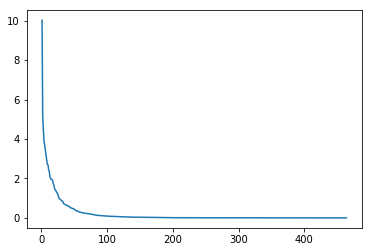

In [10]:
import matplotlib.pyplot as plt
y = pca.explained_variance_ratio_ * 100
x = np.arange(1,465)
plt.plot(x,y)
plt.show()

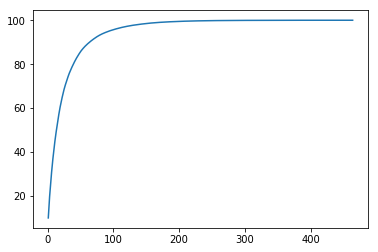

In [11]:
import matplotlib.pyplot as plt
y = np.cumsum(pca.explained_variance_ratio_ * 100)
x = np.arange(1,465)
plt.plot(x,y)
plt.show()

In [12]:
print(y)

[ 10.0165922   15.24233118  19.71828726  23.6026197   27.29461456
  30.75099172  33.93677756  36.93717429  39.65651655  42.35095511
  44.80843907  47.1676279   49.24780431  51.26304298  53.21214577
  55.15624963  57.07268183  58.83174397  60.48300889  61.98138177
  63.38690205  64.77212147  66.07462445  67.33181163  68.53399337
  69.62953326  70.60580181  71.56199029  72.50039378  73.39781574
  74.2653223   75.11536429  75.9163595   76.63175233  77.33014315
  78.00863025  78.6778969   79.3119995   79.9408361   80.54692826
  81.15018979  81.72938832  82.29399689  82.81184262  83.32519885
  83.81895369  84.29951183  84.77464148  85.24121487  85.67516032
  86.09519742  86.47861008  86.84192245  87.1903497   87.53790132
  87.86189955  88.16707385  88.46218953  88.752874    89.03795494
  89.30810417  89.57060802  89.83089338  90.0835678   90.32892475
  90.56980848  90.80611821  91.03294072  91.25634259  91.47334823
  91.68574205  91.894457    92.10071925  92.30455556  92.49601445
  92.68134

In [13]:
type(y)

numpy.ndarray

In [14]:
y.tolist()

[10.016592202258517,
 15.242331175358858,
 19.718287257166665,
 23.602619703984562,
 27.294614555746517,
 30.750991722691303,
 33.936777563614704,
 36.93717429363892,
 39.656516551846636,
 42.35095510961299,
 44.808439070320645,
 47.16762790493437,
 49.247804308068304,
 51.263042981908924,
 53.2121457715123,
 55.15624963424216,
 57.072681827469616,
 58.83174396539108,
 60.48300888556653,
 61.98138177386698,
 63.38690205236652,
 64.77212146784834,
 66.07462444542318,
 67.33181163467486,
 68.53399336986152,
 69.62953326277909,
 70.60580180688528,
 71.56199029297258,
 72.50039378424749,
 73.39781574083895,
 74.26532230111225,
 75.11536429078852,
 75.91635949556745,
 76.6317523293544,
 77.33014315128253,
 78.00863024797316,
 78.6778969010136,
 79.31199950411701,
 79.94083609700402,
 80.5469282605613,
 81.15018978839564,
 81.72938832085146,
 82.29399688518791,
 82.81184261585626,
 83.32519885241184,
 83.81895368931742,
 84.29951182606148,
 84.77464147837593,
 85.24121486721413,
 85.67516031

In [15]:
lst = y.tolist()
cols = []

for i in range(50):
        cols.append(max(lst)) #append max of list in a new list
        lst.remove(max(lst)) #remove max of list from the list

        
print(cols)
    

[100.00000000000003, 100.00000000000003, 100.00000000000003, 100.00000000000003, 100.00000000000003, 100.00000000000003, 100.00000000000003, 100.00000000000003, 100.00000000000003, 100.00000000000003, 100.00000000000003, 100.00000000000003, 100.00000000000003, 99.99999997438682, 99.9999998658555, 99.99999906617072, 99.99999823315233, 99.9999959577672, 99.99999092618519, 99.99997957640218, 99.99996385571252, 99.99994665785682, 99.99992897393966, 99.99991014745449, 99.99988617972647, 99.99985975180716, 99.9998315306335, 99.9997993891879, 99.99976169349266, 99.9997239107584, 99.99968609226966, 99.99964826227625, 99.99961029464679, 99.99956806926815, 99.99952413419236, 99.99947969455984, 99.9994288465351, 99.99937615069175, 99.99931256200355, 99.99924752677333, 99.99918143361482, 99.99911412093685, 99.99904286488079, 99.9989689311007, 99.99889334429164, 99.99881493129082, 99.99873602972254, 99.99865702451112, 99.99857363875671, 99.99848354790589]


In [16]:
df_plot = pd.DataFrame(principalComponents,
                 columns = cols,
                 index = app_test.index)

In [18]:
df_plot.head()

,10.016592202258517,15.242331175358858,19.718287257166665,23.602619703984562,27.294614555746517,30.750991722691303,33.936777563614704,36.93717429363892,39.656516551846636,42.35095510961299,...,100.00000000000003,100.00000000000003,100.00000000000003,100.00000000000003,100.00000000000003,100.00000000000003,100.00000000000003,100.00000000000003,100.00000000000003,100.00000000000003
0,-0.255718,0.695376,-0.730604,0.891197,-0.638056,-0.616738,-0.196731,1.190222,-0.757046,0.624624,...,-2.775558e-17,8.348357e-18,4.683753e-17,6.071532e-17,5.898060e-17,-5.637851e-18,-8.586881e-17,-7.285839e-17,6.938894e-18,1.214306e-17
1,-0.624208,-0.711221,-0.074133,0.198189,-0.627745,-0.073042,0.541070,-0.206975,-0.414412,0.268349,...,-2.125036e-17,4.098284e-17,-2.949030e-17,1.283695e-16,3.469447e-18,-4.423545e-17,1.127570e-17,-3.903128e-17,3.816392e-17,-2.428613e-17
2,-0.732026,0.736727,1.031896,0.498449,0.001762,-0.928943,0.330145,-0.980139,-0.069479,-0.652545,...,-1.116186e-16,2.111484e-17,1.387779e-17,-6.071532e-18,8.673617e-18,7.372575e-18,1.474515e-17,-1.700029e-16,5.247539e-17,-2.537033e-17
3,-0.151675,-0.394610,-0.322296,-0.100866,-0.923375,-0.189300,0.096807,-0.226256,0.406275,0.629674,...,-6.678685e-17,2.784367e-17,8.837603e-17,6.071532e-18,7.979728e-17,2.428613e-17,1.613293e-16,-1.266348e-16,5.074066e-17,-4.857226e-17
4,-0.492894,-1.086614,1.133127,0.357610,0.541620,-0.112438,-0.738600,0.415946,-0.028168,-0.399144,...,-3.769432e-04,3.524085e-04,-7.280017e-04,6.663246e-04,-3.351396e-04,-4.372657e-04,3.641793e-04,-6.503088e-06,2.537751e-04,-1.179688e-04


In [23]:
df_plot[cols].head()

,100.00000000000003,100.00000000000003,100.00000000000003,100.00000000000003,100.00000000000003,100.00000000000003,100.00000000000003,100.00000000000003,100.00000000000003,100.00000000000003,...,99.99918143361482,99.99911412093685,99.99904286488079,99.9989689311007,99.99889334429164,99.99881493129082,99.99873602972254,99.99865702451112,99.99857363875671,99.99848354790589
0,7.898242e-06,4.391019e-17,-1.627387e-16,-2.775558e-17,8.348357e-18,4.683753e-17,6.071532e-17,5.898060e-17,-5.637851e-18,-8.586881e-17,...,-0.000148,-0.000162,0.000120,0.000028,-5.176916e-05,0.000414,-0.000172,-0.000054,-0.000186,-0.001072
1,7.418859e-06,-2.082481e-16,-1.030534e-16,-2.125036e-17,4.098284e-17,-2.949030e-17,1.283695e-16,3.469447e-18,-4.423545e-17,1.127570e-17,...,-0.000170,-0.000153,0.000407,-0.000002,6.144935e-07,-0.000760,0.000220,-0.000240,-0.000468,-0.001081
2,-1.236778e-05,5.819455e-17,-3.916409e-16,-1.116186e-16,2.111484e-17,1.387779e-17,-6.071532e-18,8.673617e-18,7.372575e-18,1.474515e-17,...,-0.000479,-0.000277,-0.000120,-0.000370,-1.292630e-04,-0.000867,0.000335,0.000044,0.001279,0.002925
3,6.025999e-05,1.496199e-16,3.501973e-16,-6.678685e-17,2.784367e-17,8.837603e-17,6.071532e-18,7.979728e-17,2.428613e-17,1.613293e-16,...,-0.000311,-0.000245,0.000541,-0.000371,-3.285950e-04,0.000146,-0.000009,0.000402,-0.007555,0.008981
4,5.094249e-07,-1.630023e-03,5.900264e-04,-3.769432e-04,3.524085e-04,-7.280017e-04,6.663246e-04,-3.351396e-04,-4.372657e-04,3.641793e-04,...,-0.000156,-0.000104,0.000279,-0.000011,-3.698945e-05,-0.000264,0.000071,-0.000107,-0.000690,-0.001277


In [25]:
pca_loadings = pd.DataFrame(pca.components_.T, index=app_test.columns, columns=cols )
pca_loadings


ValueError: Shape of passed values is (464, 464), indices imply (50, 464)